In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

np.random.seed(42)

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# Training data prepration

In [6]:
c1_x = mnist.train.images[mnist.train.labels==8]
c1_y = mnist.train.labels[mnist.train.labels==8]
c1_y = c1_y[:,None]
other_x = mnist.train.images[mnist.train.labels!=8]
other_y = mnist.train.labels[mnist.train.labels!=8]
other_y=other_y[:,None]

np.random.seed(42)
c1 = np.concatenate((c1_x,c1_y),axis=1)
others = np.concatenate((other_x,other_y), axis=1)
print(c1.shape)
print(others.shape)
print(others)
np.random.shuffle(others)
others = np.array(others)
print(others.shape)
others321 = others[0:321,:]
print(others321.shape)
train = np.concatenate((c1,others321),axis=0)
np.random.shuffle(train)
X_train = train[:,0:-1]
Y_train = train[:,-1]
Y_train[Y_train==0]=1
Y_train[Y_train==8]=0
Y_train[Y_train!=0]=1

sum(Y_train)

# Validation data prepration

np.random.seed(42)
valX_ones = mnist.validation.images[mnist.validation.labels==8]
valY_ones = mnist.validation.labels[mnist.validation.labels==8]
valX_others = mnist.validation.images[mnist.validation.labels!=8]
valY_others = mnist.validation.labels[mnist.validation.labels!=8]
valY_ones = valY_ones[:,None]
valY_others = valY_others[:,None]
val_ones = np.concatenate((valX_ones,valY_ones),axis=1)
val_others = np.concatenate((valX_others,valY_others),axis=1)
np.random.shuffle(val_others)
val_others137 = val_others[0:137,:]
val = np.concatenate((val_ones,val_others137),axis=0)
np.random.shuffle(val)
valX = val[:,0:-1]
valY = val[:,-1]
valY[valY==0]=1
valY[valY==8]=0
valY[valY!=0]=1

sum(valY)

# Test data prepration

np.random.seed(42)
testX_ones = mnist.test.images[mnist.test.labels==8]
testY_ones = mnist.test.labels[mnist.test.labels==8]
testX_others = mnist.test.images[mnist.test.labels!=8]
testY_others = mnist.test.labels[mnist.test.labels!=8]
testY_ones = testY_ones[:,None]
testY_others = testY_others[:,None]
test_ones = np.concatenate((testX_ones,testY_ones),axis=1)
test_others = np.concatenate((testX_others,testY_others),axis=1)
np.random.shuffle(test_others)
test_others137 = test_others[0:137,:]
test = np.concatenate((test_ones,test_others137),axis=0)
np.random.shuffle(test)
testX = test[:,0:-1]
testY = test[:,-1]
testY[testY==0]=1
testY[testY==8]=0
testY[testY!=0]=1

(5389, 785)
(49611, 785)
[[0. 0. 0. ... 0. 0. 7.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 4.]
 ...
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 6.]]
(49611, 785)
(321, 785)


# Cross validation

In [1]:
"""rf = RandomForestClassifier(random_state=21,class_weight='balanced')
param_grid = {'n_estimators': range(0,500),'min_samples_split':range(2,500)}
CV_lr = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1)
CV_lr.fit(X=X_train,y=Y_train)
best_param = CV_lr.best_params_
print("Best Paramters for Random Forest: ",best_param)"""

'rf = RandomForestClassifier(random_state=21,class_weight=\'balanced\')\nparam_grid = {\'n_estimators\': range(0,500),\'min_samples_split\':range(2,500)}\nCV_lr = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring=\'f1\',n_jobs=-1)\nCV_lr.fit(X=X_train,y=Y_train)\nbest_param = CV_lr.best_params_\nprint("Best Paramters for Random Forest: ",best_param)'

# Testing

In [7]:
rf = RandomForestClassifier(n_estimators=151,min_samples_split=83,random_state=21,class_weight='balanced')
rf.fit(X_train,Y_train)
y_pred1 = rf.predict(valX)
y_pred2 = rf.predict(testX)
print ("Score on train set is: ", accuracy_score(valY,y_pred1))
print ("Score for test data is", accuracy_score(testY,y_pred2))
print("Classification report for train set")
print(classification_report(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(testY,y_pred2))
print("Classification report for test set")
print(classification_report(testY,y_pred2))

Score on train set is:  0.9449081803005008
Score for test data is 0.9504950495049505
Classification report for train set
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       462
        1.0       0.90      0.85      0.88       137

avg / total       0.94      0.94      0.94       599

Confusion matrix for train set
[[449  13]
 [ 20 117]]
Confusion matrix for train set
[[947  27]
 [ 28 109]]
Classification report for test set
             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       974
        1.0       0.80      0.80      0.80       137

avg / total       0.95      0.95      0.95      1111



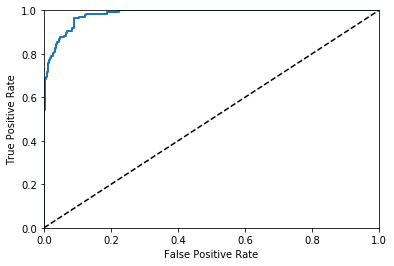

ROC AUC score is:  0.982313883601373


In [8]:
# ROC AUC Curve(
score = rf.predict_proba(testX)
score = score[:,1]
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(testY,score)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()


print("ROC AUC score is: ",roc_auc_score(testY,score))

